# Feature Extraction

## Set up

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import networkx as nx

PATH = Path.cwd().parents[0]

from utils.feature_extraction.bytecode import build_bytecode_feature_dataframe
from utils.feature_extraction.transaction import save_txn_feature_dataframe
from utils.feature_extraction.graph import generate_control_flow_graphs, generate_transaction_graphs, save_graph_features
from utils.feature_extraction.sourcecode import build_sol_feature_dataframe

MODEL_PATH = os.path.join(PATH, 'backend/models')

## Bytecode

In [2]:
LABEL_PATH = os.path.join(PATH, 'data/labeled')
HEX_PATH = os.path.join(LABEL_PATH, 'hex')
bytecode_df, _ = build_bytecode_feature_dataframe(HEX_PATH, MODEL_PATH)

invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH30
invalid instruction: PUSH24
invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH16
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH21
invalid instruction: PUSH15
invalid instruction: PUSH30
invalid instruction: PUSH26
invalid instruction: PUSH14
invalid instruction: PUSH17
invalid instruction: PUSH17
invalid instruction: PUSH20
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH20
invalid instruction: PUSH13
invalid instruction: PUSH27
invalid instruction: PUSH24
invalid instruction: PUSH27
invalid instruction: PUSH32
invalid instruction: PUSH29


In [3]:
bytecode_df.head()

,opcode_entropy,byte_entropy,byte_0x,byte_60,byte_80,byte_40,byte_52,byte_51,byte_90,byte_81,...,push3 dup2,jumpdest push3 push3,jumpdest push32 push1,dup4 add dup5,mstore pop jump,dup2 sub push1,sub push1 dup4,push2 push1 dup4,stop stop,stop stop stop
Address,,,,,,,,,,,,,,,,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,4.707072,4.420531,0.000147,0.064303,0.028105,0.007652,0.018393,0.008682,0.035462,0.026780,...,1,0,0,0,0,0,0,0,0,2
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,4.655586,6.067508,0.000280,0.117021,0.021837,0.017077,0.033035,0.008679,0.025196,0.024356,...,3,5,1,2,0,1,0,0,0,1
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,4.622489,6.275986,0.000158,0.105847,0.019490,0.012518,0.029789,0.009190,0.025511,0.023610,...,2,8,0,0,0,0,1,0,0,1
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,4.808809,5.868159,0.000393,0.106007,0.036121,0.017668,0.032195,0.015312,0.040440,0.037299,...,2,9,0,2,0,0,0,0,0,1
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,4.810756,6.076166,0.000135,0.109883,0.033437,0.016449,0.034515,0.014966,0.041931,0.034111,...,2,17,1,6,2,5,0,0,0,1


In [4]:
bytecode_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0x8275ebf521dc217aa79c88132017a5bcef001dd9 to 0x17e65e6b9b166fb8e7c59432f0db126711246bc0
Columns: 1259 entries, opcode_entropy to stop stop stop
dtypes: float64(259), int64(1000)
memory usage: 679.2+ KB


In [5]:
bytecode_df.select_dtypes(include=['object'])

""
Address
0x8275ebf521dc217aa79c88132017a5bcef001dd9
0x292e89d5d5bdab3af2f5838c194c1983f0140b43
0x2753dce37a7edb052a77832039bcc9aa49ad8b25
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7
...
0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3
0xb504035a11e672e12a099f32b1672b9c4a78b22f
0x5927b72440d8a8b8c6ca5a8be60e88975f9063fc


In [6]:
bytecode_df.isnull().sum().sort_values(ascending=False)

stop stop stop    0
opcode_entropy    0
byte_entropy      0
byte_0x           0
byte_60           0
                 ..
byte_4a           0
byte_65           0
byte_77           0
byte_6c           0
byte_00           0
Length: 1259, dtype: int64

In [7]:
bytecode_df.head()

,opcode_entropy,byte_entropy,byte_0x,byte_60,byte_80,byte_40,byte_52,byte_51,byte_90,byte_81,...,push3 dup2,jumpdest push3 push3,jumpdest push32 push1,dup4 add dup5,mstore pop jump,dup2 sub push1,sub push1 dup4,push2 push1 dup4,stop stop,stop stop stop
Address,,,,,,,,,,,,,,,,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,4.707072,4.420531,0.000147,0.064303,0.028105,0.007652,0.018393,0.008682,0.035462,0.026780,...,1,0,0,0,0,0,0,0,0,2
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,4.655586,6.067508,0.000280,0.117021,0.021837,0.017077,0.033035,0.008679,0.025196,0.024356,...,3,5,1,2,0,1,0,0,0,1
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,4.622489,6.275986,0.000158,0.105847,0.019490,0.012518,0.029789,0.009190,0.025511,0.023610,...,2,8,0,0,0,0,1,0,0,1
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,4.808809,5.868159,0.000393,0.106007,0.036121,0.017668,0.032195,0.015312,0.040440,0.037299,...,2,9,0,2,0,0,0,0,0,1
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,4.810756,6.076166,0.000135,0.109883,0.033437,0.016449,0.034515,0.014966,0.041931,0.034111,...,2,17,1,6,2,5,0,0,0,1


In [8]:
bytecode_df.to_csv(os.path.join(LABEL_PATH, 'bytecode_feature.csv'))

### Graphs

In [9]:
graphs = generate_control_flow_graphs(os.path.join(LABEL_PATH, 'hex'))

Processing control flow of 0x8275ebf521dc217aa79c88132017a5bcef001dd9
Processing control flow of 0x292e89d5d5bdab3af2f5838c194c1983f0140b43
Processing control flow of 0x2753dce37a7edb052a77832039bcc9aa49ad8b25
Processing control flow of 0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5
Processing control flow of 0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7
Processing control flow of 0x50c6ec50a89a946c5886aeb54a22fe732558f7d1
Processing control flow of 0x42269ac712372ac89a158ad5a32806c6b6782d66
Processing control flow of 0xec4cb1148ec60e00a6bfcfce4482db724db6bdde
Processing control flow of 0x3e597ea168a85aa2ae5e2c4333665bcd875ed10f
Processing control flow of 0xb954562066c71b3e6e7b2ac330b03c74c0dcd5ae
Processing control flow of 0x25d8f027fd25eecbcd812521fb2f75f175807a91
Processing control flow of 0xd00736f864ecd5bef5996c735f98769ae0d10c7c
Processing control flow of 0xc71d244f7ad6c869ecbf13cbd9acae31718be4f8
Processing control flow of 0xabe776435f7459e2f5ba773bfb753ed19a053dd0
Processing control f

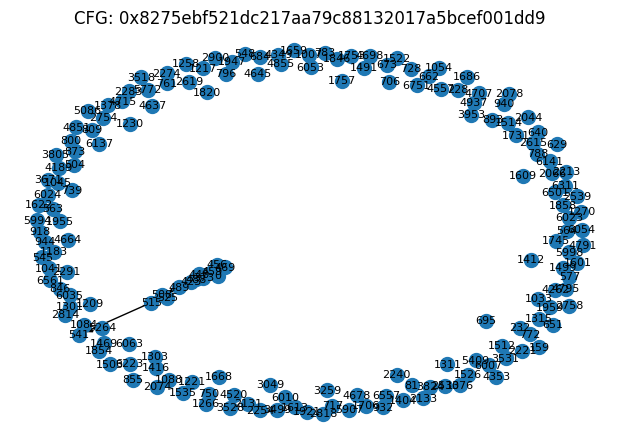

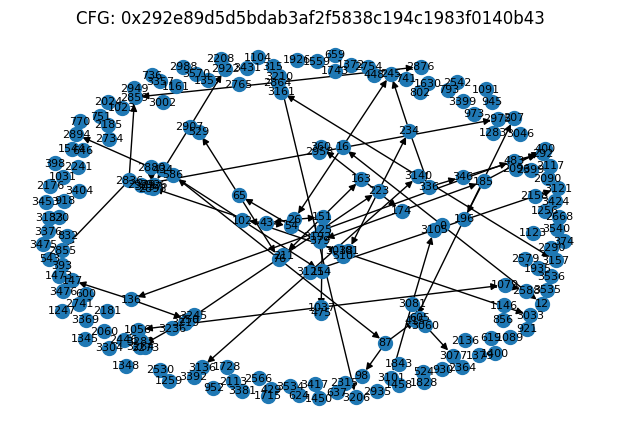

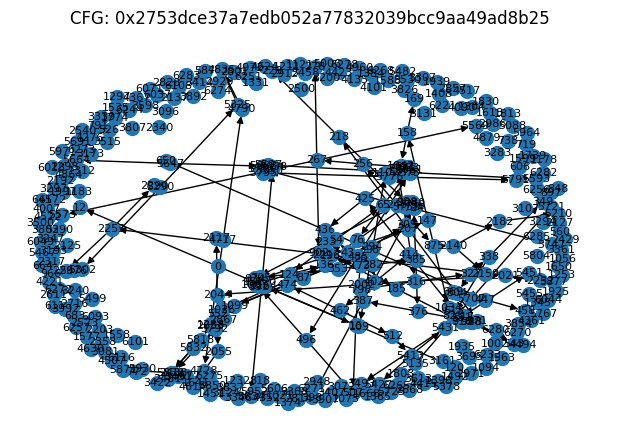

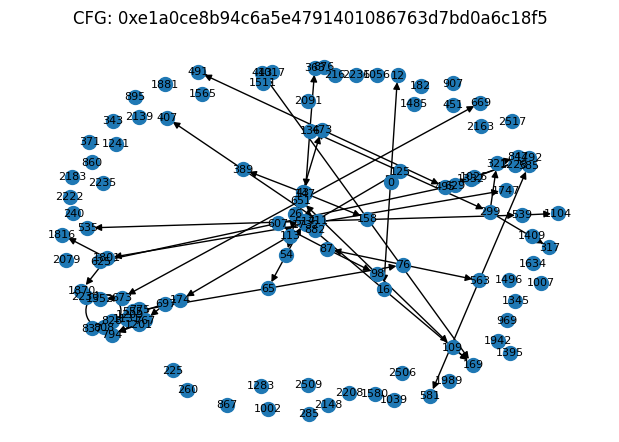

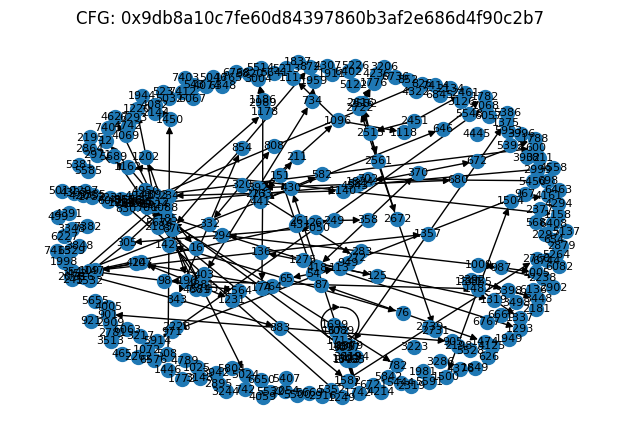

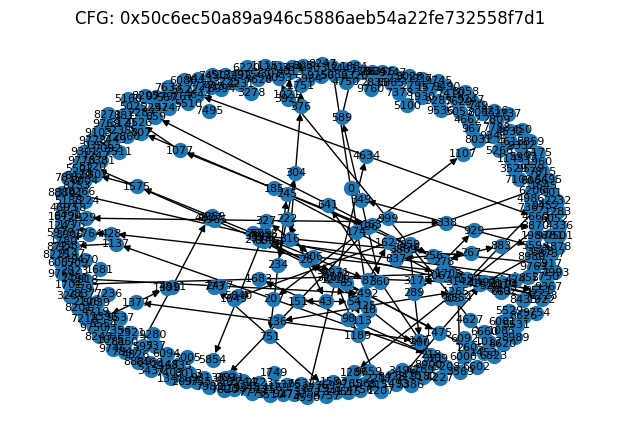

In [10]:
for i, (addr, graph) in enumerate(graphs.items()):
    plt.figure(figsize=(6, 4))
    nx.draw(graph, with_labels=True, node_size=100, font_size=8)
    plt.title(f"CFG: {addr}")
    plt.show()
    if i == 5:
        break

In [11]:
df = save_graph_features(LABEL_PATH, 'cfg', graphs)
df.head()

,num_nodes,num_edges,avg_degree,density,connected_components,avg_clustering
Address,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,176,16,0.181818,0.000519,164,0.000000
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,194,96,0.989691,0.002564,112,0.012027
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,339,178,1.050147,0.001553,192,0.003933
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,113,78,1.380531,0.006163,46,0.000000
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,303,211,1.392739,0.002306,122,0.007701


In [12]:
df.select_dtypes(include=['object'])

""
Address
0x8275ebf521dc217aa79c88132017a5bcef001dd9
0x292e89d5d5bdab3af2f5838c194c1983f0140b43
0x2753dce37a7edb052a77832039bcc9aa49ad8b25
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7
...
0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3
0xb504035a11e672e12a099f32b1672b9c4a78b22f
0x5927b72440d8a8b8c6ca5a8be60e88975f9063fc


## Transaction

In [13]:
txn_df = save_txn_feature_dataframe(os.path.join(LABEL_PATH, 'txn'))

In [14]:
txn_df.head()

,txn_nums,event_nums,creation_block,creation_timestamp,start_block,end_block,life_time,start_time,end_time,duration_seconds,...,presalemint_num,changepresalestate_num,setapprovalforall_num,safetransferfrom_num,release_num,setbaseuri_num,reveal_num,createordinaltrade_num,enableordinaltrade_num,removeordinallimit_num
Address,,,,,,,,,,,,,,,,,,,,,
0x50c6ec50a89a946c5886aeb54a22fe732558f7d1,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c,1,2,16832271,1678870799,16832271.0,16832271.0,0.0,1.678871e+09,1.678871e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xba751bff276907c438e927d2c2f18de574195e4b,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x1c5ee1ffebec5f3e1686e8e59d43f96a3c702b7f,15,65,18559580,1699837391,18559580.0,18567687.0,8107.0,1.699837e+09,1.699935e+09,97896.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
txn_df.select_dtypes(include=['object'])

""
Address
0x50c6ec50a89a946c5886aeb54a22fe732558f7d1
0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c
0xba751bff276907c438e927d2c2f18de574195e4b
0x1c5ee1ffebec5f3e1686e8e59d43f96a3c702b7f
...
0xe0b9d4146aad6936cbfcbe4dae47e34aab96b093
0x9372b371196751dd2f603729ae8d8014bbeb07f6
0x797885c0a6cfffcbc4d2e3c1ca0b4f07112db6a3


In [16]:
txn_df["buy_amt"].map(type).value_counts()

buy_amt
<class 'float'>    69
Name: count, dtype: int64

In [17]:
txn_df.isnull().sum().sort_values(ascending=False)

removeordinallimit_num    0
txn_nums                  0
maxtxamountupdated_num    0
removelimits_num          0
transferenabled_num       0
                         ..
end_block                 0
life_time                 0
start_time                0
end_time                  0
duration_seconds          0
Length: 98, dtype: int64

In [18]:
txn_df.to_csv(os.path.join(LABEL_PATH, 'transaction_feature.csv'))

### Graphs

In [19]:
graphs = generate_transaction_graphs(os.path.join(LABEL_PATH, 'txn'))

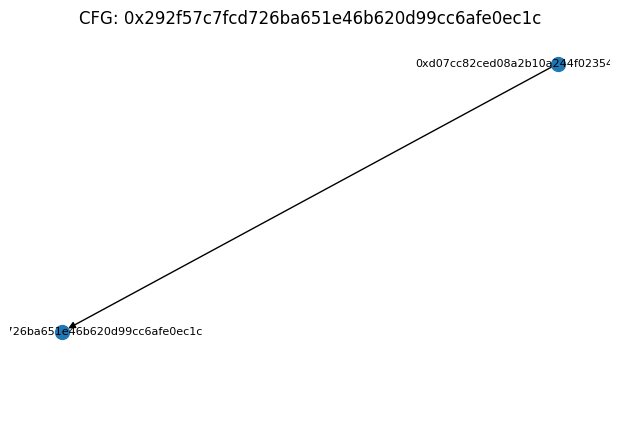

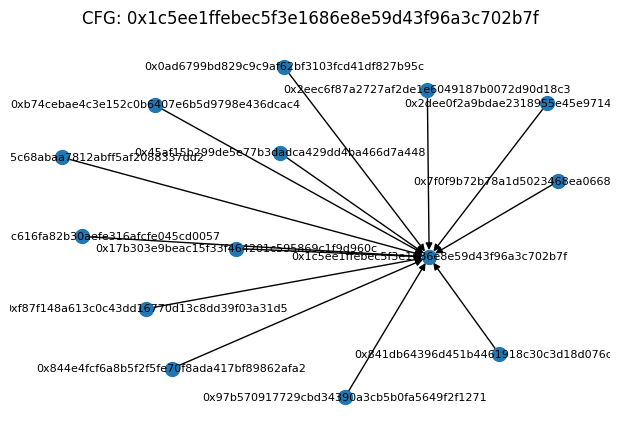

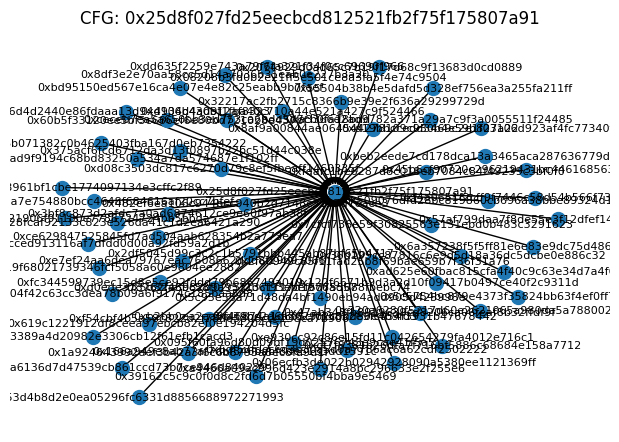

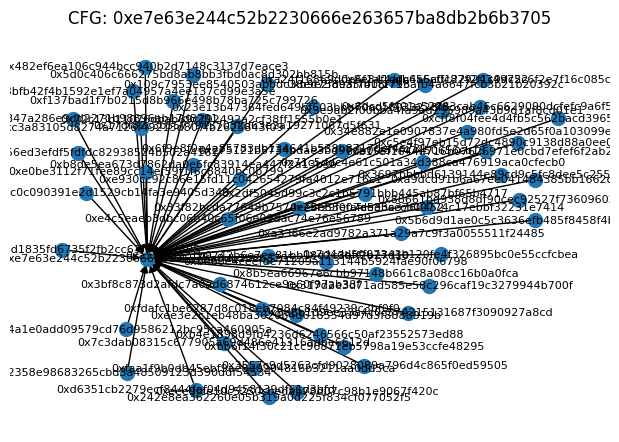

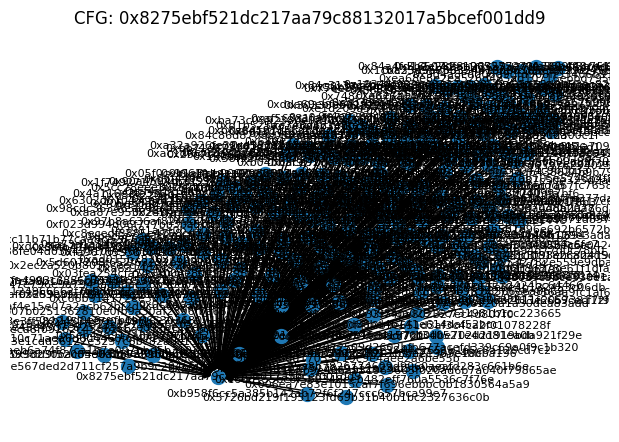

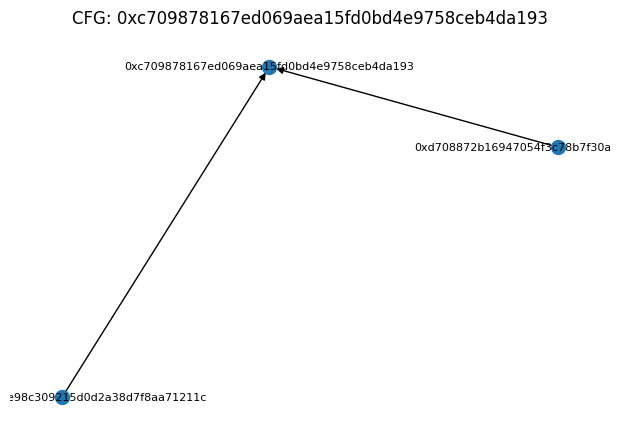

In [20]:
for i, (addr, graph) in enumerate(graphs.items()):
    plt.figure(figsize=(6, 4))
    nx.draw(graph, with_labels=True, node_size=100, font_size=8)
    plt.title(f"CFG: {addr}")
    plt.show()
    if i == 5:
        break

In [21]:
df = save_graph_features(LABEL_PATH, 'txn', graphs)
df.head()

,num_nodes,num_edges,avg_degree,density,connected_components,avg_clustering
Address,,,,,,
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c,2,1,1.000000,0.500000,1,0.0
0x1c5ee1ffebec5f3e1686e8e59d43f96a3c702b7f,14,13,1.857143,0.071429,1,0.0
0x25d8f027fd25eecbcd812521fb2f75f175807a91,66,65,1.969697,0.015152,1,0.0
0xe7e63e244c52b2230666e263657ba8db2b6b3705,57,56,1.964912,0.017544,1,0.0
0x8275ebf521dc217aa79c88132017a5bcef001dd9,253,252,1.992095,0.003953,1,0.0


## Solidity

In [22]:
tf_idf_df, _ = build_sol_feature_dataframe(os.path.join(LABEL_PATH, 'sol'), MODEL_PATH)

In [23]:
tf_idf_df.head()

,file,openzeppelin,contracts,token,erc20,ierc20,sol,last,updated,v4,...,inner,coin,airdrop,pausable,pause,unpause,callable,whennotpaused,whenpaused,stopped
Address,,,,,,,,,,,,,,,,,,,,,
0xa0ffc741f109159ee203424a299e6d2731dcfc76,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
0x85aa3f04e539e426cbb55c0d584ea99cfe1d96a1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c,0.097607,0.022009,0.0,0.004272,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008798,0.0,0.0,0.004154,0.004689,0.0,0.098214
0xe4182e57eeb29fbc2b3469e45c9e385cea8995ab,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
0x108d0f1fc10ed324f8cc65d0a91cad11cd4994a4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [24]:
tf_idf_df.select_dtypes(include=['object'])

""
Address
0xa0ffc741f109159ee203424a299e6d2731dcfc76
0x85aa3f04e539e426cbb55c0d584ea99cfe1d96a1
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c
0xe4182e57eeb29fbc2b3469e45c9e385cea8995ab
0x108d0f1fc10ed324f8cc65d0a91cad11cd4994a4
...
0x4165084a6e5388ce53c9d9892f904a2712dd943a
0x831467b7b6bf9c705dc87899d48b57ee55c8d5cc
0x1250b98cbde9f99f4c42dcdacee193221f17eb50


In [25]:
tf_idf_df.to_csv(os.path.join(LABEL_PATH, 'tf_idf.csv'))